<a href="https://colab.research.google.com/github/Trwsk35/ML-Bootcamp/blob/main/5_DeepLearning_ClassificationTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning

### Deep Neural Networks

- Traditional Machine Learning algorithms were trained on extracted features.
  - Scaled well for problems involving structured data (tabular)
  - Did not scale well for problems involving unstructured data (images, videos, audio, speech, etc)

Additional References:
1. CMU: 11-785 Introduction to Deep Learning (Spring 2025)
https://youtu.be/NXYrIEP1LRs

In [38]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [39]:
# Hyperparameters (User Configurable)
learning_rate = 0.001  #@param {type:"number"}
random_seed = 42  #@param {type:"integer"}
num_epochs = 8 #@param {type:"integer"}

# Set random seed for reproducibility
torch.manual_seed(random_seed)
np.random.seed(random_seed)

In [40]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Device: {device}")

Device: cuda


In [41]:
# Data loading and preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

In [42]:
train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data', train=False, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)

print(f"Train dataset classes: {train_loader.dataset.classes}")
print(f"Test dataset classes: {test_loader.dataset.classes}")

Train dataset classes: ['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']
Test dataset classes: ['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']


In [43]:
# Define the neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 784)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [44]:
# Initialize the model, loss function, and optimizer
model = Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [45]:
# Training loop
def train(epoch):
    model.train()
    # print(f"Epoch = {epoch}")
    for batch_idx, (data, target) in enumerate(train_loader):
        # print(f"batch number = {batch_idx}")
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

In [46]:
# Testing loop and generating evaluation metrics
def test():
    model.eval()
    correct = 0
    total = 0
    all_preds = []
    all_targets = []
    with torch.no_grad():
        for data, target in test_loader:
          data, target = data.to(device), target.to(device)
          output = model(data)
          _, predicted = torch.max(output.data, 1)
          total += target.size(0)
          correct += (predicted == target).sum().item()
          all_preds.extend(predicted.cpu().numpy())
          all_targets.extend(target.cpu().numpy())
    return correct / total, all_preds, all_targets

In [47]:
# Test accuracy before training
accuracy, predictions, targets = test()
print(f'Before training: Test Accuracy {accuracy * 100:.2f}%')

Before training: Test Accuracy 10.78%


In [48]:
for epoch in range(1, num_epochs + 1):
    train(epoch)
    accuracy, predictions, targets = test()
    print(f'Epoch {epoch}: Test Accuracy {accuracy * 100:.2f}%')

Epoch 1: Test Accuracy 95.62%
Epoch 2: Test Accuracy 96.87%
Epoch 3: Test Accuracy 97.29%
Epoch 4: Test Accuracy 97.63%
Epoch 5: Test Accuracy 97.56%
Epoch 6: Test Accuracy 97.40%
Epoch 7: Test Accuracy 97.88%
Epoch 8: Test Accuracy 97.64%


              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.99      0.97      1032
           3       0.99      0.96      0.98      1010
           4       0.98      0.97      0.97       982
           5       0.96      0.99      0.97       892
           6       0.99      0.98      0.98       958
           7       0.99      0.96      0.97      1028
           8       0.98      0.97      0.97       974
           9       0.96      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



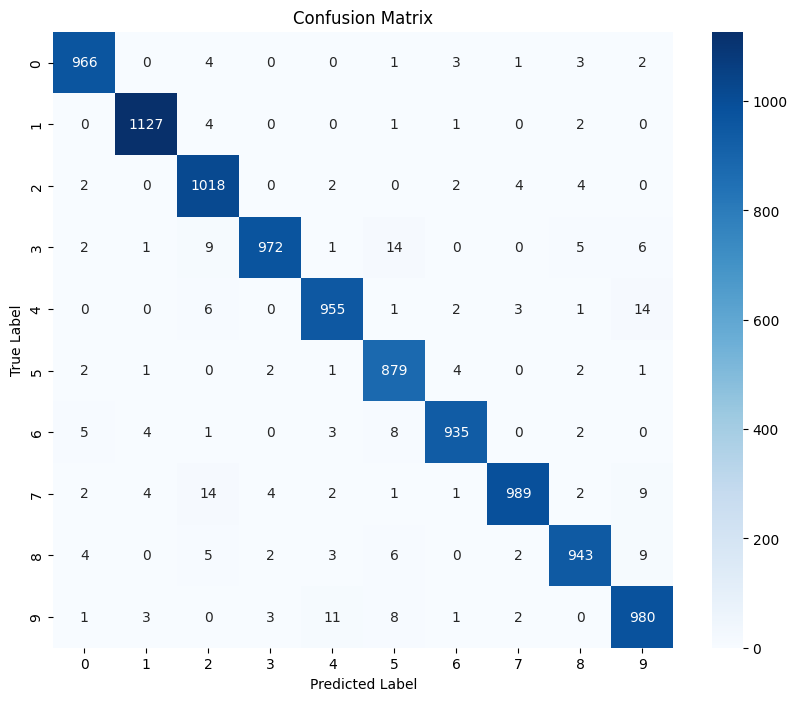

In [49]:
# Additional Evaluations (after training)
print(classification_report(targets, predictions))

cm = confusion_matrix(targets, predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

### EXERCISE:
1. Modify the code to plot the training accuracy and loss over the training epochs

2. Modify the code to plot the test accuracy over the training epochs

3. Plot example inferences and show actual and predicted values